In [50]:
import pandas as pd
from matplotlib import pyplot as plt
from pprint import *

In [3]:
#Import CSV file
df = pd.read_csv('data\orders.csv', sep=';')
df.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,True
1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,459,False
2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,464,True
3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,678,False
4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,353,False


In [51]:
#Find unique 3rd party companies
pl_3_types = df['3pl'].unique()
pl_3_types.sort()

#Vector[3rd party company id] [percentatge lateness respect total orders managed] [total orders managed]
lateness_pl = []
for pl in pl_3_types:
    late_orders = len(df[(df['3pl'] == pl) & (df['late_order'] == True)])
    total_orders = len(df[df['3pl'] == pl])
    lateness_pl.append([pl, late_orders / total_orders, total_orders])
print(lateness_pl)

[['v_001', 0.38209853328318916, 7977], ['v_002', 0.1994466388772594, 54937], ['v_003', 0.2502524159815376, 6933], ['v_004', 0.2569492898782327, 44429]]


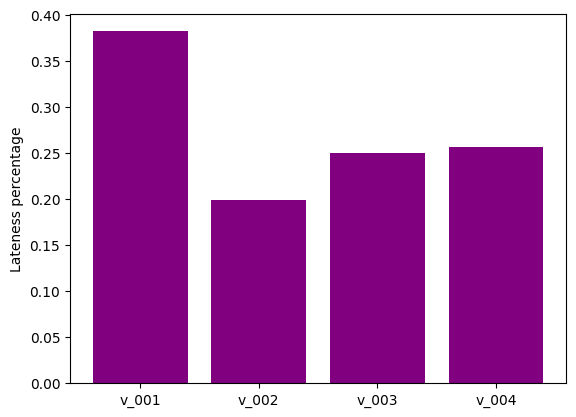

In [54]:
#generate plot of the lateness of each 3pl (we plot the percentatge of lateness)
plt.bar([x[0] for x in lateness_pl], [x[1] for x in lateness_pl])
plt.ylabel('Lateness percentage')
plt.bar([x[0] for x in lateness_pl], [x[1] for x in lateness_pl], color='purple')
plt.show()